In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
pio.templates.default = "plotly_white"

In [ ]:
data =pd.read_csv('/content/Sample - Superstore.csv', encoding ='latin-1')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**Converting date column**

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [ ]:
data['Order Month']= data['Order Date'].dt.month
data['Order Year']= data['Order Date'].dt.year
data['Order DayOfWeek']= data['Order Date'].dt.dayofweek

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order DayOfWeek
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


**Monthly Sales Analysis**

In [ ]:
sales_by_month= data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month,
              x= 'Order Month',
              y= 'Sales',
              title = 'Monthle Sales Analysis')
fig.show()

**Sales By Categories**

In [ ]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
print(sales_by_category)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [ ]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
fig =px.pie(sales_by_category,
             names='Category',
             values='Sales',
            hole=0.5,
            color_discrete_sequence=colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis By category',title_font=dict(size=24))
fig.show()

**Sales Analysis By Sub Category**

In [ ]:
sales_by_subcategory=data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory,
             x='Sub-Category',
             y='Sales',
             title='Sales Analysis By Sub-Category')
fig.show()

**Monthly Profit Analysis**

In [ ]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month,
              x='Order Month',
              y='Profit',
              title='Monthly Profit Analysis')
fig.show()

**Profit By Category**

In [ ]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()
fig = px.pie(profit_by_category,
             names='Category',
             values='Profit',
             hole=0.5,
             color_discrete_sequence=colors.qualitative.Pastel)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis By Category', title_font=dict(size=24))
fig.show()

**Profit Analysis By Sub Category**

In [ ]:
profit_by_subcategory= data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory,
             x='Sub-Category',
             y='Profit',
             title='Profit Analysis By Sub-Category')
fig.show()

**Sales And Profit- Customer Segment**

In [ ]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
colors_palette = colors.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Sales'],
                     name='Sales',
                     marker_color=colors_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=colors_palette[1]))
fig.update_layout(title='Sales and Profit by Customer Segment',
                  xaxis_title='Customer Segment',
                  yaxis_title='Amount',
                  barmode='group')
fig.show()

**Sales To Profit ratio**

In [ ]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment','Sales_Profit_Ratio']])

       Segment  Sales_Profit_Ratio
0     Consumer            8.659471
1    Corporate            7.677245
2  Home Office            7.125416


**Encode Categorical Features**

> Add blockquote



In [ ]:
# Encode categorical features
data = data.drop(columns=['Order Date', 'Ship Date'])
data_encoded = pd.get_dummies(data, drop_first=True)

**Split Feature and Target**

In [ ]:
X = data_encoded.drop('Profit', axis=1)
y = data_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Model**

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror',
                         colsample_bytree=0.3,
                         learning_rate=0.1,
                         max_depth=5,
                         alpha=10,
                         n_estimators=100)
# Fit the model on the training data
model.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

**Evaluate Model**

In [ ]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 22638.069257689633
R2 Score: 0.5330924917436913


**Model Visualizing**

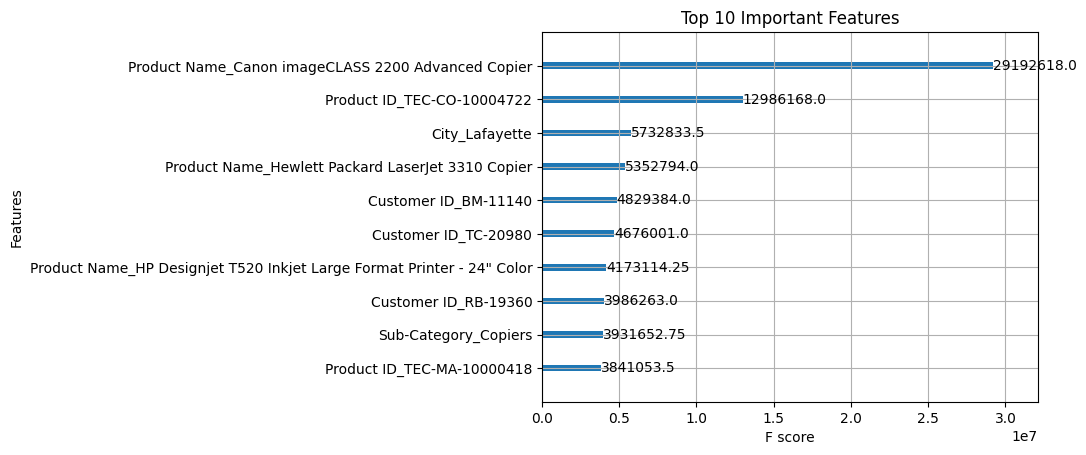

In [ ]:
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features")
plt.show()
